# I. Xử lý dữ liệu

In [1]:
#import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#đọc dữ liệu
shelf = pd.read_csv('/content/drive/MyDrive/Datasets/DSTC/03_Shelf_Information_Data.csv')
item = pd.read_csv('/content/drive/MyDrive/Datasets/DSTC/03_Item_Information_Data.csv')
cust = pd.read_csv('/content/drive/MyDrive/Datasets/DSTC/03_Customer_Behavior_Data.csv')

In [3]:
shelf.head()

,Shelf ID,Description,Location_x (center),Location_y (center),Width,Height,Length,Number of items,Shape
0,0,Quầy bánh kẹo,1100,550,300,180,300,13,Quầy tròn
1,1,Quầy hoá mỹ phẩm,350,500,100,180,400,18,Kệ hàng
2,2,Quầy sữa,600,400,100,180,600,9,Kệ hàng
3,3,Quầy thực phẩm,1450,400,100,180,600,25,Kệ hàng
4,4,Quầy gia vị,1100,150,500,180,100,19,Kệ hàng


In [4]:
shelf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Shelf ID             8 non-null      int64 
 1   Description          8 non-null      object
 2   Location_x (center)  8 non-null      int64 
 3   Location_y (center)  8 non-null      int64 
 4   Width                8 non-null      int64 
 5   Height               8 non-null      int64 
 6   Length               8 non-null      int64 
 7   Number of items      8 non-null      int64 
 8   Shape                8 non-null      object
dtypes: int64(7), object(2)
memory usage: 704.0+ bytes


In [5]:
shelf.Description.unique()

array(['Quầy bánh kẹo', 'Quầy hoá mỹ phẩm', 'Quầy sữa', 'Quầy thực phẩm',
       'Quầy gia vị', 'Quầy gia dụng', 'Quầy sách và đồ chơi',
       'Quầy đông lạnh'], dtype=object)

In [6]:
shelf.isnull().sum()

,0
Shelf ID,0
Description,0
Location_x (center),0
Location_y (center),0
Width,0
Height,0
Length,0
Number of items,0
Shape,0


In [7]:
shelf.duplicated().sum()

0

In [8]:
item.head()

,Shelf ID,Item ID,Name,Origin,Location,Weight (g),Price,NSX,HSD,Marketing strategy,Discount,Rate
0,0,0,Bánh Oreo,Vietnam,Cao,120.0,"17,500 ₫",2023-11-14,2024-10-17,False,10,4
1,0,1,Bánh Chocopie,Vietnam,Cao,396.0,"48,000 ₫",2023-10-07,2024-09-16,False,0,3
2,0,2,Kẹo cao su Cool Air Fresh,Vietnam,Trung bình,40.0,"40,000 ₫",2024-06-02,2026-06-02,False,0,3
3,0,3,Bánh mỳ chà bông Kinh đô,Vietnam,Trung bình,80.0,"13,400 ₫",2024-05-02,2026-05-02,False,0,3
4,0,4,Bánh trứng Custard,Thái Lan,Trung bình,46.0,"17,000 ₫",2023-10-30,2024-04-16,True,10,4


In [9]:
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Shelf ID            134 non-null    int64  
 1   Item ID             134 non-null    int64  
 2   Name                134 non-null    object 
 3   Origin              134 non-null    object 
 4   Location            134 non-null    object 
 5   Weight (g)          110 non-null    float64
 6   Price               134 non-null    object 
 7   NSX                 100 non-null    object 
 8   HSD                 100 non-null    object 
 9   Marketing strategy  134 non-null    bool   
 10  Discount            134 non-null    int64  
 11  Rate                134 non-null    int64  
dtypes: bool(1), float64(1), int64(4), object(6)
memory usage: 11.8+ KB


In [10]:
#loại bỏ ký tự tiền và chuyển Price về định dạng int64
item['Price'] = item['Price'].str.replace(',', '').str.replace(' ₫', '').astype('int64')

In [54]:
item.isnull().sum()

,0
Shelf ID,0
Item ID,0
Name,0
Origin,0
Location,0
Weight (g),0
Price,0
NSX,0
HSD,0
Marketing strategy,0


In [12]:
#xem NSX và HSD của từng naame trong item
item[item.isnull().any(axis=1)]

,Shelf ID,Item ID,Name,Origin,Location,Weight (g),Price,NSX,HSD,Marketing strategy,Discount,Rate
20,1,7,Dao cạo râu Gillet,Thailand,Thấp,NaN,40000,2024-01-19,2024-06-03,False,0,4
21,1,8,Tăm bông ngoáy tai Famapro,Vietnam,Thấp,NaN,17000,2023-08-25,2024-03-23,False,11,4
22,1,9,Bàn chải Colgate,Vietnam,Thấp,NaN,79500,2024-07-16,2024-03-23,False,5,5
23,1,10,Khăn tắm Shine,Vietnam,Trung bình,NaN,115000,2024-07-11,2025-01-11,True,20,5
24,1,11,Khăn mặt Shine,Vietnam,Trung bình,NaN,23000,2023-09-25,2024-02-20,True,20,5
25,1,12,Bông tẩy trang Kokimi,Vietnam,Thấp,NaN,54000,2024-03-11,2024-11-25,False,0,4
26,1,13,Tã dán Merries size NB 76 miếng (dưới 5kg),Nhật Bản,Cao,NaN,385000,2024-07-11,2025-03-16,False,0,3
27,1,14,Tã dán sơ sinh Bobby siêu mỏng Newborn 70 miế...,Nhật Bản,Cao,NaN,215000,2024-04-23,2024-08-11,False,0,3
28,1,15,Tã dán sơ sinh Goo.n Premium Newborn 70 miếng,Nhật Bản,Cao,NaN,300000,2023-08-19,2024-03-10,True,10,5
29,1,16,Băng ban ngày Diana,Nhật Bản,Cao,NaN,21000,2023-09-07,2024-08-17,False,0,4


In [13]:
#thay giá trị item thiếu với 0
item.fillna(0, inplace=True)

In [14]:
item.dtypes

,0
Shelf ID,int64
Item ID,int64
Name,object
Origin,object
Location,object
Weight (g),float64
Price,int64
NSX,object
HSD,object
Marketing strategy,bool


In [15]:
item.Name.unique()

array(['Bánh Oreo', 'Bánh Chocopie', 'Kẹo cao su Cool Air Fresh',
       'Bánh mỳ chà bông Kinh đô', 'Bánh trứng Custard',
       'Hạt hướng dương Chacheer', 'Bim bim Oishi',
       'Snack khoai tây Lays', 'Bánh gạo Richi', 'Socola trứng Kinder',
       'Kẹo dẻo Alphelibe', 'Thạch rau câu Đức Hạnh',
       'Kẹo Haribo charshmallows', 'Dầu gội XMen', 'Dầu gội Romano',
       'Dầu gội Dove', 'Dầu gội Sunsilk', 'Sửa rửa mặt Oxy',
       'Sửa rửa mặt Hada Labo', 'Sửa rửa mặt Simple',
       'Dao cạo râu Gillet', 'Tăm bông ngoáy tai Famapro',
       'Bàn chải Colgate', 'Khăn tắm Shine', 'Khăn mặt Shine',
       'Bông tẩy trang Kokimi',
       'Tã dán Merries size NB 76 miếng (dưới 5kg)',
       'Tã dán sơ sinh Bobby siêu mỏng Newborn 70 miếng (cho bé dưới 5kg)',
       'Tã dán sơ sinh Goo.n Premium Newborn 70 miếng',
       'Băng ban ngày Diana ', 'Băng ban đêm Diana Super Night',
       'Lốc 4 hộp sữa tươi Vinamilk 100% ít đường',
       'Lốc 4 hộp sữa tươi ít đường TH true MILK',
     

In [16]:
item.duplicated().sum()

0

In [17]:
cust.head()

,Shelf ID,Person ID,Timestamp,Age,Gender,Height,Weight,Married status,Moving speed (m/s),Item ID,Looking at item (s),Holding the item (s),Holding the bag,Picking up item,Returning item,Putting item into bag,Taking item out of bag,Putting item into bag in the 2nd time
0,4,1,1720260000,52,Female,162,41,Married,0.19,16,27,36,True,True,False,False,False,True
1,4,1,1720260120,52,Female,162,41,Married,0.49,5,22,17,True,True,False,True,True,True
2,4,1,1720260300,52,Female,162,41,Married,0.36,4,25,39,True,True,True,True,True,False
3,4,1,1720260360,52,Female,162,41,Married,0.64,8,21,35,True,True,True,False,False,False
4,4,1,1720260480,52,Female,162,41,Married,0.13,6,27,16,True,True,False,False,False,True


In [18]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15394 entries, 0 to 15393
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Shelf ID                               15394 non-null  int64  
 1   Person ID                              15394 non-null  int64  
 2   Timestamp                              15394 non-null  int64  
 3   Age                                    15394 non-null  int64  
 4   Gender                                 15394 non-null  object 
 5   Height                                 15394 non-null  int64  
 6   Weight                                 15394 non-null  int64  
 7   Married status                         15394 non-null  object 
 8   Moving speed (m/s)                     15394 non-null  float64
 9   Item ID                                15394 non-null  int64  
 10  Looking at item (s)                    15394 non-null  int64  
 11  Ho

In [23]:
cust.isnull().sum()

,0
Shelf ID,0
Person ID,0
Timestamp,0
Age,0
Gender,0
Height,0
Weight,0
Married status,0
Moving speed (m/s),0
Item ID,0


In [20]:
#xem các giá trị false của holding the bag
cust[cust['Holding the bag'] == False]

,Shelf ID,Person ID,Timestamp,Age,Gender,Height,Weight,Married status,Moving speed (m/s),Item ID,Looking at item (s),Holding the item (s),Holding the bag,Picking up item,Returning item,Putting item into bag,Taking item out of bag,Putting item into bag in the 2nd time
27,0,4,1720262100,70,Male,175,77,Married,1.37,5,22,23,False,True,False,False,True,False
28,0,4,1720262340,70,Male,175,77,Married,1.37,0,15,30,False,True,False,True,False,True
29,0,4,1720262400,70,Male,175,77,Married,1.22,8,33,37,False,True,False,True,True,True
30,0,4,1720262580,70,Male,175,77,Married,0.52,1,31,28,False,True,True,True,False,True
31,0,4,1720262640,70,Male,175,77,Married,0.61,6,23,38,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15389,2,1500,1720151340,52,Female,154,44,Single,0.52,4,32,35,False,True,False,True,True,True
15390,3,1500,1720151640,52,Female,154,44,Single,0.85,3,30,28,False,True,False,True,True,True
15391,3,1500,1720151760,52,Female,154,44,Single,0.76,21,54,56,False,True,False,False,True,False
15392,3,1500,1720151880,52,Female,154,44,Single,1.41,13,16,25,False,True,False,False,True,True


In [21]:
#show dữ liệu bị thiếu ở cust
cust[cust.isnull().any(axis=1)]

,Shelf ID,Person ID,Timestamp,Age,Gender,Height,Weight,Married status,Moving speed (m/s),Item ID,Looking at item (s),Holding the item (s),Holding the bag,Picking up item,Returning item,Putting item into bag,Taking item out of bag,Putting item into bag in the 2nd time
7,7,2,1720260960,55,Female,150,54,Single,0.77,1,20,31,True,True,True,True,NaN,True
9,7,2,1720261140,55,Female,150,54,Single,0.12,11,18,15,True,True,True,True,NaN,NaN
10,2,2,1720261320,55,Female,150,54,Single,0.68,2,20,32,True,True,True,True,NaN,False
11,2,2,1720261620,55,Female,150,54,Single,0.24,6,36,18,True,True,True,True,False,NaN
12,2,2,1720261740,55,Female,150,54,Single,0.81,8,37,26,True,True,False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15376,0,1497,1720149780,25,Female,154,42,Single,0.27,5,39,39,False,True,False,True,False,NaN
15378,0,1497,1720149900,25,Female,154,42,Single,1.21,12,20,38,False,True,False,False,False,NaN
15379,3,1498,1720150080,46,Male,169,61,Married,0.56,11,15,17,False,True,False,False,True,NaN
15383,7,1498,1720150680,46,Male,169,61,Married,1.06,10,32,16,False,True,False,False,True,NaN


In [52]:
#fill các giá trị bị thiếu
def fill_missing_values(cust):
    # Xét trường hợp Returning item là True
    cust.loc[cust['Returning item'] == True, ['Putting item into bag', 'Taking item out of bag', 'Putting item into bag in the 2nd time']] = False

    # Xét trường hợp Returning item là False
    cust.loc[cust['Returning item'] == False, :] = cust.loc[cust['Returning item'] == False, :].apply(lambda x: fill_row(x), axis=1)

    return cust

def fill_row(row):
    if pd.isna(row['Putting item into bag']):
        row['Putting item into bag'] = row['Taking item out of bag'] if not pd.isna(row['Taking item out of bag']) else (not row['Putting item into bag in the 2nd time'] if not pd.isna(row['Putting item into bag in the 2nd time']) else np.nan)
    if pd.isna(row['Taking item out of bag']):
        row['Taking item out of bag'] = (not row['Putting item into bag']) if not pd.isna(row['Putting item into bag']) else (row['Putting item into bag'] and row['Putting item into bag in the 2nd time'] if not pd.isna(row['Putting item into bag in the 2nd time']) else np.nan)
    if pd.isna(row['Putting item into bag in the 2nd time']):
        row['Putting item into bag in the 2nd time'] = (not row['Taking item out of bag'] and not row['Putting item into bag']) if not pd.isna(row['Taking item out of bag']) and not pd.isna(row['Putting item into bag']) else ((row['Putting item into bag'] and not row['Taking item out of bag']) if not pd.isna(row['Putting item into bag']) and not pd.isna(row['Taking item out of bag']) else np.nan)
    return row

cust = fill_missing_values(cust)

In [24]:
cust.duplicated().sum()

0

In [57]:
cust.dtypes

,0
Shelf ID,int64
Person ID,int64
Timestamp,int64
Age,int64
Gender,object
Height,int64
Weight,int64
Married status,object
Moving speed (m/s),float64
Item ID,int64


In [56]:
#đổi puttting item into bag, taking item out of bag, putting 2nd sang định dạng bool
cust['Putting item into bag'] = cust['Putting item into bag'].astype('bool')
cust['Taking item out of bag'] = cust['Taking item out of bag'].astype('bool')
cust['Putting item into bag in the 2nd time'] = cust['Putting item into bag in the 2nd time'].astype('bool')

In [27]:
#đổi cột timestamp về định dạng ngày
cust['Date'] = pd.to_datetime(cust['Timestamp'], unit='s')
cust.head()

,Shelf ID,Person ID,Timestamp,Age,Gender,Height,Weight,Married status,Moving speed (m/s),Item ID,Looking at item (s),Holding the item (s),Holding the bag,Picking up item,Returning item,Putting item into bag,Taking item out of bag,Putting item into bag in the 2nd time,Date
0,4,1,1720260000,52,Female,162,41,Married,0.19,16,27,36,True,True,False,False,False,True,2024-07-06 10:00:00
1,4,1,1720260120,52,Female,162,41,Married,0.49,5,22,17,True,True,False,True,True,True,2024-07-06 10:02:00
2,4,1,1720260300,52,Female,162,41,Married,0.36,4,25,39,True,True,True,False,False,False,2024-07-06 10:05:00
3,4,1,1720260360,52,Female,162,41,Married,0.64,8,21,35,True,True,True,False,False,False,2024-07-06 10:06:00
4,4,1,1720260480,52,Female,162,41,Married,0.13,6,27,16,True,True,False,False,False,True,2024-07-06 10:08:00


# II. Phân tích dữ liệu

Câu 1:

In [28]:
#thêm cột name từ dataframe item vào cust thông gia shelf id và item id
cust = pd.merge(cust, item[['Shelf ID', 'Item ID', 'Name']], on=['Shelf ID', 'Item ID'], how='left')

In [29]:
cust.head()

,Shelf ID,Person ID,Timestamp,Age,Gender,Height,Weight,Married status,Moving speed (m/s),Item ID,Looking at item (s),Holding the item (s),Holding the bag,Picking up item,Returning item,Putting item into bag,Taking item out of bag,Putting item into bag in the 2nd time,Date,Name
0,4,1,1720260000,52,Female,162,41,Married,0.19,16,27,36,True,True,False,False,False,True,2024-07-06 10:00:00,Dầu hào Maggi
1,4,1,1720260120,52,Female,162,41,Married,0.49,5,22,17,True,True,False,True,True,True,2024-07-06 10:02:00,Dầu ăn Tường An
2,4,1,1720260300,52,Female,162,41,Married,0.36,4,25,39,True,True,True,False,False,False,2024-07-06 10:05:00,Dầu ăn Simply
3,4,1,1720260360,52,Female,162,41,Married,0.64,8,21,35,True,True,True,False,False,False,2024-07-06 10:06:00,Mỳ chính Miwon
4,4,1,1720260480,52,Female,162,41,Married,0.13,6,27,16,True,True,False,False,False,True,2024-07-06 10:08:00,Dầu ăn Meizan


In [30]:
#Thống kê 5 mặt hàng có tổng thời gian Looking at item và	Holding the item lâu nhất
cust['total_time'] = cust['Looking at item (s)'] + cust['Holding the item (s)']
cust.groupby('Name')['total_time'].sum().sort_values(ascending=False).head()

,total_time
Name,
Sữa chua uống Probi,22896
Sữa chua uống Yakult,22896
Sữa ông thọ,13939
Bim bim Oishi,13866
Snack khoai tây Lays,13362


Câu 2:

In [31]:
#Thống kê 5 mặt hàng thường được cầm lên rồi trả lại nhiều nhất
cust[(cust['Picking up item'] == True) & (cust['Returning item'] == True)].groupby('Name')['Name'].count().sort_values(ascending=False).head()

,Name
Name,
4 hộp sữa lúa mạch Milo 180ml,134
Snack khoai tây Lays,127
Mý ý SG Food,117
Nước lẩu Barona,116
Bánh Chocopie,114


In [58]:
#xác định xem sản phẩm có được mua không
def is_purchased(row):
  if row['Putting item into bag'] == True and row['Taking item out of bag'] == False:
    return True
  elif row['Putting item into bag'] == True and row['Taking item out of bag'] == True and row['Putting item into bag in the 2nd time'] == True:
    return True
  else:
    return False

cust['is_purchased'] = cust.apply(is_purchased, axis=1)

In [33]:
# Define the age bins and labels
bins = [18, 30, 60, np.inf]
labels = ['Thiếu niên', 'Trung niên', 'Cao tuổi']

# Create a new column 'Age Group' based on the categorization
cust['Age Group'] = pd.cut(cust['Age'], bins=bins, labels=labels, right=False)

In [34]:
cust.head(10)

,Shelf ID,Person ID,Timestamp,Age,Gender,Height,Weight,Married status,Moving speed (m/s),Item ID,...,Picking up item,Returning item,Putting item into bag,Taking item out of bag,Putting item into bag in the 2nd time,Date,Name,total_time,is_purchased,Age Group
0,4,1,1720260000,52,Female,162,41,Married,0.19,16,...,True,False,False,False,True,2024-07-06 10:00:00,Dầu hào Maggi,63,False,Trung niên
1,4,1,1720260120,52,Female,162,41,Married,0.49,5,...,True,False,True,True,True,2024-07-06 10:02:00,Dầu ăn Tường An,39,True,Trung niên
2,4,1,1720260300,52,Female,162,41,Married,0.36,4,...,True,True,False,False,False,2024-07-06 10:05:00,Dầu ăn Simply,64,False,Trung niên
3,4,1,1720260360,52,Female,162,41,Married,0.64,8,...,True,True,False,False,False,2024-07-06 10:06:00,Mỳ chính Miwon,56,False,Trung niên
4,4,1,1720260480,52,Female,162,41,Married,0.13,6,...,True,False,False,False,True,2024-07-06 10:08:00,Dầu ăn Meizan,43,False,Trung niên
5,4,1,1720260720,52,Female,162,41,Married,1.26,5,...,True,False,True,False,True,2024-07-06 10:12:00,Dầu ăn Tường An,46,True,Trung niên
6,7,2,1720260720,55,Female,150,54,Single,1.26,11,...,True,False,False,False,False,2024-07-06 10:12:00,Pizza kitkool,74,False,Trung niên
7,7,2,1720260960,55,Female,150,54,Single,0.77,1,...,True,True,False,False,False,2024-07-06 10:16:00,Kem vinamilk,51,False,Trung niên
8,7,2,1720261020,55,Female,150,54,Single,0.39,15,...,True,False,False,False,False,2024-07-06 10:17:00,Xúc xích CP,51,False,Trung niên
9,7,2,1720261140,55,Female,150,54,Single,0.12,11,...,True,True,False,False,False,2024-07-06 10:19:00,Pizza kitkool,33,False,Trung niên


Câu 3:

In [59]:
#Các nhóm khách hàng theo độ tuổi (Thiếu niên: 18 - 30; Trung niên: 31 - 60; Caotuổi: > 60) mua mặt hàng nào nhiều nhất
cust[cust['is_purchased'] == True].groupby('Age Group')['Name'].value_counts().groupby(level=0).head(1)

<ipython-input-59-bcaa74f88655>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cust[cust['is_purchased'] == True].groupby('Age Group')['Name'].value_counts().groupby(level=0).head(1)
<ipython-input-59-bcaa74f88655>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cust[cust['is_purchased'] == True].groupby('Age Group')['Name'].value_counts().groupby(level=0).head(1)


,,count
Age Group,Name,
Thiếu niên,Lốc 4 hộp sữa tươi ít đường TH true MILK,42
Trung niên,Lốc 4 hộp sữa tươi ít đường TH true MILK,92
Cao tuổi,Lốc 4 hộp sữa tươi ít đường TH true MILK,53


In [36]:
#thêm cột price từ dataframe item vào cust thông gia shelf id và item id
cust = pd.merge(cust, item[['Shelf ID', 'Item ID', 'Price']], on=['Shelf ID', 'Item ID'], how='left')
cust.head()

,Shelf ID,Person ID,Timestamp,Age,Gender,Height,Weight,Married status,Moving speed (m/s),Item ID,...,Returning item,Putting item into bag,Taking item out of bag,Putting item into bag in the 2nd time,Date,Name,total_time,is_purchased,Age Group,Price
0,4,1,1720260000,52,Female,162,41,Married,0.19,16,...,False,False,False,True,2024-07-06 10:00:00,Dầu hào Maggi,63,False,Trung niên,28500
1,4,1,1720260120,52,Female,162,41,Married,0.49,5,...,False,True,True,True,2024-07-06 10:02:00,Dầu ăn Tường An,39,True,Trung niên,64500
2,4,1,1720260300,52,Female,162,41,Married,0.36,4,...,True,False,False,False,2024-07-06 10:05:00,Dầu ăn Simply,64,False,Trung niên,79000
3,4,1,1720260360,52,Female,162,41,Married,0.64,8,...,True,False,False,False,2024-07-06 10:06:00,Mỳ chính Miwon,56,False,Trung niên,34000
4,4,1,1720260480,52,Female,162,41,Married,0.13,6,...,False,False,False,True,2024-07-06 10:08:00,Dầu ăn Meizan,43,False,Trung niên,47000


Câu 4:

In [37]:
#Ngày nào trong tuần có doanh thu cao nhất
cust['Day of Week'] = cust['Date'].dt.day_name()
cust[cust['is_purchased'] == True].groupby('Day of Week')['Price'].sum().sort_values(ascending=False).head()

,Price
Day of Week,
Saturday,196403600
Sunday,184844400
Thursday,57723700
Tuesday,57559000
Friday,50820700


Câu 5:

In [38]:
#Trong 3 nhóm tuổi sau: Thiếu niên (18 - 30), Trung niên (31 - 60), Cao tuổi: (> 60), nhóm tuổi nào có số người đi siêu thị nhiều nhất
cust.groupby('Age Group')['Person ID'].nunique().sort_values(ascending=False).head()

<ipython-input-38-943c1d5f279f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cust.groupby('Age Group')['Person ID'].nunique().sort_values(ascending=False).head()


,Person ID
Age Group,
Trung niên,766
Cao tuổi,427
Thiếu niên,307


In [39]:
#thêm cột discount từ dataframe item vào cust thông gia shelf id và item id
cust = pd.merge(cust, item[['Shelf ID', 'Item ID', 'Discount ']], on=['Shelf ID', 'Item ID'], how='left')
cust.head()

,Shelf ID,Person ID,Timestamp,Age,Gender,Height,Weight,Married status,Moving speed (m/s),Item ID,...,Taking item out of bag,Putting item into bag in the 2nd time,Date,Name,total_time,is_purchased,Age Group,Price,Day of Week,Discount
0,4,1,1720260000,52,Female,162,41,Married,0.19,16,...,False,True,2024-07-06 10:00:00,Dầu hào Maggi,63,False,Trung niên,28500,Saturday,10
1,4,1,1720260120,52,Female,162,41,Married,0.49,5,...,True,True,2024-07-06 10:02:00,Dầu ăn Tường An,39,True,Trung niên,64500,Saturday,5
2,4,1,1720260300,52,Female,162,41,Married,0.36,4,...,False,False,2024-07-06 10:05:00,Dầu ăn Simply,64,False,Trung niên,79000,Saturday,10
3,4,1,1720260360,52,Female,162,41,Married,0.64,8,...,False,False,2024-07-06 10:06:00,Mỳ chính Miwon,56,False,Trung niên,34000,Saturday,5
4,4,1,1720260480,52,Female,162,41,Married,0.13,6,...,False,True,2024-07-06 10:08:00,Dầu ăn Meizan,43,False,Trung niên,47000,Saturday,0


Câu 6

In [40]:
#Top 5 các mặt hàng giảm giá được người dùng mua nhiều nhất
cust[(cust['Discount '] > 0) & (cust['is_purchased'] == True)].groupby('Name')['Name'].count().sort_values(ascending=False).head()

,Name
Name,
Bánh trứng Custard,163
Kem tràng tiền,158
Sữa bột Milo,153
Dầu gội Romano,99
Khăn mặt Shine,93


In [41]:
#thêm cột Marketing strategy từ dataframe item vào cust thông gia shelf id và item id
cust = pd.merge(cust, item[['Shelf ID', 'Item ID', 'Marketing strategy']], on=['Shelf ID', 'Item ID'], how='left')
cust.head()

,Shelf ID,Person ID,Timestamp,Age,Gender,Height,Weight,Married status,Moving speed (m/s),Item ID,...,Putting item into bag in the 2nd time,Date,Name,total_time,is_purchased,Age Group,Price,Day of Week,Discount,Marketing strategy
0,4,1,1720260000,52,Female,162,41,Married,0.19,16,...,True,2024-07-06 10:00:00,Dầu hào Maggi,63,False,Trung niên,28500,Saturday,10,False
1,4,1,1720260120,52,Female,162,41,Married,0.49,5,...,True,2024-07-06 10:02:00,Dầu ăn Tường An,39,True,Trung niên,64500,Saturday,5,False
2,4,1,1720260300,52,Female,162,41,Married,0.36,4,...,False,2024-07-06 10:05:00,Dầu ăn Simply,64,False,Trung niên,79000,Saturday,10,False
3,4,1,1720260360,52,Female,162,41,Married,0.64,8,...,False,2024-07-06 10:06:00,Mỳ chính Miwon,56,False,Trung niên,34000,Saturday,5,False
4,4,1,1720260480,52,Female,162,41,Married,0.13,6,...,True,2024-07-06 10:08:00,Dầu ăn Meizan,43,False,Trung niên,47000,Saturday,0,False


Câu 7:

In [42]:
#Top 5 các mặt hàng được chạy quảng cáo được người dùng mua nhiều nhất
cust[(cust['Marketing strategy'] == True) & (cust['is_purchased'] == True)].groupby('Name')['Name'].count().sort_values(ascending=False).head()

,Name
Name,
Bánh trứng Custard,163
Kem tràng tiền,158
Sữa bột Milo,153
Khăn mặt Shine,93
Khăn tắm Shine,90


In [43]:
#thêm cột description ở shelf vào cust thông qua shelf id
cust = pd.merge(cust, shelf[['Shelf ID', 'Description']], on='Shelf ID', how='left')
cust.head()

,Shelf ID,Person ID,Timestamp,Age,Gender,Height,Weight,Married status,Moving speed (m/s),Item ID,...,Date,Name,total_time,is_purchased,Age Group,Price,Day of Week,Discount,Marketing strategy,Description
0,4,1,1720260000,52,Female,162,41,Married,0.19,16,...,2024-07-06 10:00:00,Dầu hào Maggi,63,False,Trung niên,28500,Saturday,10,False,Quầy gia vị
1,4,1,1720260120,52,Female,162,41,Married,0.49,5,...,2024-07-06 10:02:00,Dầu ăn Tường An,39,True,Trung niên,64500,Saturday,5,False,Quầy gia vị
2,4,1,1720260300,52,Female,162,41,Married,0.36,4,...,2024-07-06 10:05:00,Dầu ăn Simply,64,False,Trung niên,79000,Saturday,10,False,Quầy gia vị
3,4,1,1720260360,52,Female,162,41,Married,0.64,8,...,2024-07-06 10:06:00,Mỳ chính Miwon,56,False,Trung niên,34000,Saturday,5,False,Quầy gia vị
4,4,1,1720260480,52,Female,162,41,Married,0.13,6,...,2024-07-06 10:08:00,Dầu ăn Meizan,43,False,Trung niên,47000,Saturday,0,False,Quầy gia vị


Câu 8:

In [44]:
#Top 3 quầy hàng có thời lượng trung bình quan tâm đến sản phẩm, trên số lượt tương tác, là lâu nhất
total_time_per_shelf = cust.groupby('Description')['total_time'].sum()

interactions_per_shelf = cust[cust['Picking up item'] == True].groupby('Description')['Picking up item'].count()

# Calculate weighted average time spent
weighted_average_time = total_time_per_shelf / interactions_per_shelf

# Sort and display the top 3
print(weighted_average_time.sort_values(ascending=False).head(3))

Description
Quầy gia dụng     62.260184
Quầy đông lạnh    61.009985
Quầy thực phẩm    59.845622
dtype: float64


Câu 9:

In [45]:
#Top 3 quầy hàng có số sản phẩm được mua nhiều nhất
cust[cust['is_purchased'] == True].groupby('Description')['Name'].count().sort_values(ascending=False).head(3)

,Name
Description,
Quầy hoá mỹ phẩm,983
Quầy đông lạnh,788
Quầy bánh kẹo,671


Câu 10:

In [46]:
#biểu diễn thứ tự đi các shelf của mỗi personal id theo ngày
shelf_order = cust.groupby('Person ID')['Shelf ID'].apply(list)
shelf_order.head()

,Shelf ID
Person ID,
1,"[4, 4, 4, 4, 4, 4]"
2,"[7, 7, 7, 7, 2, 2, 2, 2, 0, 0, 0, 0, 0]"
3,"[1, 1, 2, 2, 2, 2, 2, 2]"
4,"[0, 0, 0, 0, 0]"
5,"[7, 7, 7, 7, 7, 7, 3]"


In [47]:
def get_transitions(shelf_list):
  transitions = []
  for i in range(1, len(shelf_list)):
    if shelf_list[i] != shelf_list[i-1]:
      transitions.append([shelf_list[i-1], shelf_list[i]])
  return transitions

# Apply the function to the shelf_order Series
transitions_per_person = shelf_order.apply(get_transitions)

# Print the result
print(transitions_per_person)

Person ID
1                     []
2       [[7, 2], [2, 0]]
3               [[1, 2]]
4                     []
5               [[7, 3]]
              ...       
1496                  []
1497                  []
1498    [[3, 0], [0, 7]]
1499            [[2, 7]]
1500            [[2, 3]]
Name: Shelf ID, Length: 1500, dtype: object


In [48]:
from collections import Counter

# Convert transitions to tuples and flatten the list
all_transitions = [tuple(t) for person_transitions in transitions_per_person for t in person_transitions]

# Count the occurrences of each transition
transition_counts = Counter(all_transitions)

# Print the result
print(transition_counts)

Counter({(7, 0): 123, (0, 7): 109, (1, 7): 104, (7, 1): 92, (7, 4): 92, (7, 2): 79, (2, 0): 77, (4, 7): 77, (2, 7): 76, (0, 1): 72, (1, 0): 71, (4, 1): 65, (0, 2): 65, (1, 2): 59, (0, 3): 57, (1, 4): 57, (2, 1): 56, (4, 0): 54, (0, 4): 54, (3, 7): 54, (3, 0): 49, (2, 4): 48, (0, 6): 46, (4, 2): 43, (7, 3): 40, (5, 7): 38, (7, 6): 37, (3, 1): 36, (7, 5): 35, (6, 0): 35, (4, 3): 34, (1, 6): 33, (1, 3): 32, (6, 1): 32, (5, 1): 32, (3, 2): 31, (6, 7): 31, (2, 3): 31, (6, 4): 28, (6, 2): 27, (5, 0): 26, (4, 6): 26, (1, 5): 26, (3, 4): 25, (2, 6): 24, (5, 4): 20, (0, 5): 19, (5, 2): 19, (2, 5): 19, (3, 6): 17, (4, 5): 16, (3, 5): 15, (5, 3): 14, (6, 3): 13, (6, 5): 11, (5, 6): 9})


Câu 11:

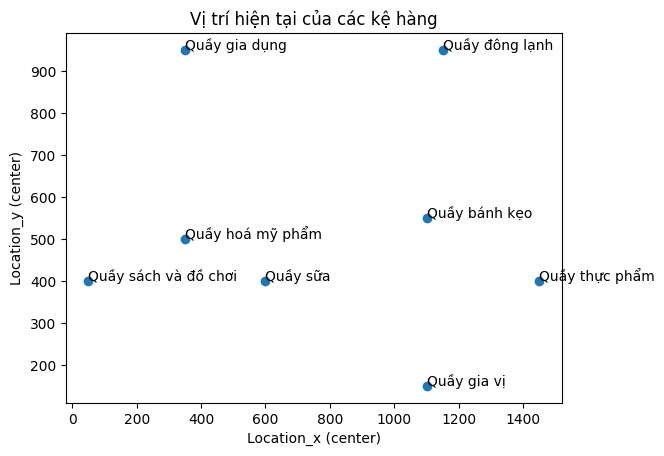

In [49]:
# Giả sử shelf là DataFrame chứa thông tin về kệ hàng
plt.scatter(shelf['Location_x (center)'], shelf['Location_y (center)'])
plt.xlabel('Location_x (center)')
plt.ylabel('Location_y (center)')
plt.title('Vị trí hiện tại của các kệ hàng')

# Thêm chú thích cho từng kệ hàng
for i, row in shelf.iterrows():
    plt.annotate(row['Description'], (row['Location_x (center)'], row['Location_y (center)']))

plt.show()

In [53]:
# Group by 'Person ID' and aggregate 'Name' into lists
products_per_person = cust.groupby('Person ID')['Name'].apply(list)

# Find pairs of products bought together
def get_pairs(product_list):
  pairs = []
  for i in range(len(product_list)):
    for j in range(i + 1, len(product_list)):
      pairs.append(tuple(sorted((product_list[i], product_list[j]))))
  return pairs

product_pairs = products_per_person.apply(get_pairs)

# Count occurrences of each pair
from collections import Counter
pair_counts = Counter([pair for pairs in product_pairs for pair in pairs])

# Get the most frequent pairs
most_frequent_pairs = pair_counts.most_common()

# Print the result
for pair, count in most_frequent_pairs:
  print(f"{pair}: {count}")

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
('Sách Ðạo Tình', 'Sách Ðắc Nhẫn Tâm'): 8
('Nước lẩu Barona', 'Sách Ðắc Nhẫn Tâm'): 8
('Sách Ðắc Nhẫn Tâm', 'Thạch rau câu Đức Hạnh'): 8
('Nước lẩu Barona', 'Sách Ðạo Tình'): 8
('Sữa bột Milo', 'Ðậu đỏ'): 8
('Bánh Chocopie', 'Sách cho trẻ sơ sinh đến 6 tháng tuổi'): 8
('Bánh gạo Richi', 'Sách cho trẻ từ 4-5 tuổi'): 8
('Sách cho trẻ sơ sinh đến 6 tháng tuổi', 'Sửa chua TH'): 8
('Mý ý SG Food', 'Sách Thám tử Sherlock Home'): 8
('Lốc 4 hộp sữa tươi ít đường TH true MILK', 'Sách Cẩm Nang Mang Thai & Sinh con'): 8
('Máy xay sinh tố Comet', 'Sữa chua uống Probi'): 8
('Máy xay sinh tố Comet', 'Pizza kitkool'): 8
('Sách Chào con Ba mẹ đã sẵn sàng', 'Truyện Doraemon'): 8
('Bim bim Oishi', 'Ngũ cốc VinaCafe'): 8
('Dầu ăn Meizan', 'Sữa chua Susu'): 8
('Lốc 4 hộp sữa tươi ít đường TH true MILK', 'Mỳ chính Miwon'): 8
('Dầu gội Romano', 'Nước mắm cho bé Thuyền xưa'): 8
('Nước mắm Chinsu', 'Pizza kitkool'): 8
('Bia 333', 'Tã dán Merries size NB

1. Tập trung các quầy hàng có liên quan:

- Quầy thực phẩm (2), quầy gia vị (4), quầy đông lạnh (7): Đây là những quầy hàng có liên quan chặt chẽ về mặt nhu cầu của khách hàng. Việc đặt chúng gần nhau sẽ giúp khách hàng dễ dàng tìm kiếm và mua sắm các sản phẩm cần thiết.
- Quầy hóa mỹ phẩm (1), quầy bánh kẹo (0): Hai quầy này cũng có thể được đặt gần nhau, đặc biệt là khi có nhiều sản phẩm liên quan như bánh kẹo, đồ uống, đồ ăn nhẹ thường được mua cùng với các sản phẩm chăm sóc cá nhân.

2. Tạo các khu vực mua sắm theo chủ đề:

- Khu vực thực phẩm: Bao gồm quầy thực phẩm tươi sống, quầy đồ khô, quầy gia vị, quầy đồ uống.
- Khu vực chăm sóc cá nhân: Bao gồm quầy hóa mỹ phẩm, quầy đồ dùng cá nhân.
- Khu vực đồ ăn nhẹ: Bao gồm quầy bánh kẹo, quầy đồ uống.

3. Xét đến yếu tố luồng di chuyển của khách hàng:

- Quầy đông lạnh: Nên đặt ở vị trí dễ nhìn thấy ngay khi khách hàng bước vào cửa hàng để thu hút sự chú ý.
- Các quầy 0, 1, 4 cũng nên đặt gần quầy đông lạnh vì đây thường là các quầy mà khách hàng đến sau khi rời quầy số 7.
- Dựa vào thói quen mua sắm thấy được những sản phẩm như đò ăn vặt hay sách,... hay được mua cùng nhau ta có thể đặt các quầy chứ những sản phầm này gần nhau

4. Tối ưu hóa trưng bày sản phẩm:

- Các sản phẩm sữa: Sữa chua uống, sữa ông thọ, sữa lúa mạch Milo... cho thấy nhu cầu về các sản phẩm sữa khá lớn, đặc biệt là đối với các nhóm tuổi khác nhau. Nên trưng bày các sản phẩm sữa ở vị trí dễ nhìn, có ánh sáng tốt để thu hút sự chú ý của khách hàng. Đồng thời, cung cấp thêm thông tin về thành phần, công dụng của từng sản phẩm để khách hàng dễ dàng so sánh và lựa chọn.
- Sản phẩm được cầm nhiều nhưng ít mua: Cần xem xét lại vị trí trưng bày, bao bì sản phẩm hoặc tổ chức các chương trình khuyến mãi để tăng tỷ lệ chuyển đổi. Một số sản phẩm như Snack khoai tây Lays, Mý ý SG Food thường được khách hàng cầm lên xem xét kỹ lưỡng nhưng lại không mua.
- Sản phẩm theo nhóm tuổi: Nên phân chia các sản phẩm theo nhóm tuổi để khách hàng dễ dàng tìm kiếm sản phẩm phù hợp. Ví dụ, các sản phẩm dành cho trẻ em có thể được trưng bày ở vị trí thấp, dễ với tầm tay của trẻ.

-> Sắp xếp các gian hàng: Dựa trên phân tích trên, ta có thể sắp xếp các gian hàng sao cho các quầy hàng thường được xem cùng nhau được đặt gần nhau. Điều này sẽ giúp khách hàng dễ dàng tìm thấy các sản phẩm họ cần và tăng khả năng mua hàng.

Câu 11:



In [50]:
# Sản phẩm có Marketing strategy hoặc Discount
revenue_marketing_or_discount = cust[((cust['Marketing strategy'] == True) | (cust['Discount '] > 0)) & (cust['is_purchased'] == True)]['Price'].sum()

# Sản phẩm có Marketing strategy và Discount
revenue_marketing_and_discount = cust[((cust['Marketing strategy'] == True) & (cust['Discount '] > 0)) & (cust['is_purchased'] == True)]['Price'].sum()

# Sản phẩm chỉ có Discount
revenue_discount = cust[((cust['Marketing strategy'] == False) & (cust['Discount '] > 0)) & (cust['is_purchased'] == True)]['Price'].sum()

# Sản phẩm chỉ có Marketing strategy
revenue_marketing = cust[((cust['Marketing strategy'] == True) & (cust['Discount '] == 0)) & (cust['is_purchased'] == True)]['Price'].sum()


# Sản phẩm chỉ có Marketing strategy
revenue_none = cust[((cust['Marketing strategy'] == False) & (cust['Discount '] == 0)) & (cust['is_purchased'] == True)]['Price'].sum()

#tổng doanh thu
revenue_total = cust[cust['is_purchased'] == True]['Price'].sum()

print("Doanh thu (Marketing or Discount):", revenue_marketing_or_discount)
print("Doanh thu (Marketing & Discount):", revenue_marketing_and_discount)
print("Doanh thu (Marketing):", revenue_marketing)
print("Doanh thu (Discount):", revenue_discount)
print("Doanh thu (Không):", revenue_none)
print("Tổng doanh thu:", revenue_total)

Doanh thu (Marketing or Discount): 418292600
Doanh thu (Marketing & Discount): 259676200
Doanh thu (Marketing): 0
Doanh thu (Discount): 158616400
Doanh thu (Không): 210277300
Tổng doanh thu: 628569900


In [51]:
# Tính số lượt xem sản phẩm
cust['view'] = cust['Looking at item (s)'] > 0

# Tính tỷ lệ chuyển đổi cho từng nhóm sản phẩm
def conversion_rate(df):
  return df['is_purchased'].sum() / df['view'].sum() * 100

cr_marketing_or_discount = conversion_rate(cust[(cust['Marketing strategy'] == True) | (cust['Discount '] > 0)])
cr_marketing_and_discount = conversion_rate(cust[(cust['Marketing strategy'] == True) & (cust['Discount '] > 0)])
cr_marketing = conversion_rate(cust[(cust['Marketing strategy'] == True) & (cust['Discount '] == 0)])
cr_discount = conversion_rate(cust[(cust['Marketing strategy'] == False) & (cust['Discount '] > 0)])
cr_none = conversion_rate(cust[(cust['Marketing strategy'] == False) & (cust['Discount '] == 0)])

print(f"Tỷ lệ chuyển đổi (Marketing or Discount): {cr_marketing_or_discount:.2f}%")
print(f"Tỷ lệ chuyển đổi (Marketing & Discount): {cr_marketing_and_discount:.2f}%")
print(f"Tỷ lệ chuyển đổi (Marketing): {cr_marketing:.2f}%")
print(f"Tỷ lệ chuyển đổi (Discount): {cr_discount:.2f}%")
print(f"Tỷ lệ chuyển đổi (Không): {cr_none:.2f}%")

# Phân tích theo nhóm tuổi
def analyze_age_group(df):
  return df.groupby('Age Group')['is_purchased'].mean() * 100

cr_age_group = analyze_age_group(cust)
print("\nTỷ lệ chuyển đổi theo nhóm tuổi:")
print(cr_age_group)

# Phân tích theo thời gian (ví dụ theo ngày trong tuần)
cr_day_of_week = cust.groupby('Day of Week')['is_purchased'].mean() * 100
print("\nTỷ lệ chuyển đổi theo ngày trong tuần:")
print(cr_day_of_week)

Tỷ lệ chuyển đổi (Marketing or Discount): 39.13%
Tỷ lệ chuyển đổi (Marketing & Discount): 68.87%
Tỷ lệ chuyển đổi (Marketing): nan%
Tỷ lệ chuyển đổi (Discount): 28.25%
Tỷ lệ chuyển đổi (Không): 22.32%

Tỷ lệ chuyển đổi theo nhóm tuổi:
Age Group
Thiếu niên    29.460201
Trung niên    29.113269
Cao tuổi      28.473804
Name: is_purchased, dtype: float64

Tỷ lệ chuyển đổi theo ngày trong tuần:
Day of Week
Friday       28.675016
Monday       26.455026
Saturday     29.707379
Sunday       29.315001
Thursday     27.364865
Tuesday      30.195783
Wednesday    28.708551
Name: is_purchased, dtype: float64


<ipython-input-51-f6b689f8a987>:6: RuntimeWarning: invalid value encountered in scalar divide
  return df['is_purchased'].sum() / df['view'].sum() * 100
<ipython-input-51-f6b689f8a987>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df.groupby('Age Group')['is_purchased'].mean() * 100


1. Phân tích hiệu quả theo từng chiến dịch

Chiến dịch Marketing & Discount:
- Doanh thu: Cao nhất trong tất cả các chiến dịch, cho thấy sự kết hợp giữa marketing và giảm giá mang lại hiệu quả tốt nhất trong việc thúc đẩy doanh số.
- Tỷ lệ chuyển đổi: Cũng đạt mức cao nhất, chứng tỏ chiến dịch này rất hiệu quả trong việc chuyển đổi khách hàng tiềm năng thành khách hàng thực tế.

Chiến dịch Discount:
- Doanh thu: Thấp hơn so với chiến dịch Marketing & Discount nhưng vẫn cao hơn so với chiến dịch marketing.
- Tỷ lệ chuyển đổi: cao hơn so với khi không sử dụng chiến dịch, cho thấy giảm giá là một công cụ hiệu quả để thu hút khách hàng.

Chiến dịch Marketing:
- Doanh thu: Không có dữ liệu, có thể do chiến dịch này không mang lại doanh thu hoặc chưa được đo lường đầy đủ.
- Chiến dịch marketing không thể mang lại doanh thu nếu được thực hiện riêng biệt mà phải kết hợp với chiến dịch discount.

Không áp dụng chiến dịch:
- Doanh thu: Thấp hơn so với áp dụng các chiến dịch cho thấy việc áp dụng các chiến dịch marketing và sale là cần thiết để tăng doanh thu.
- Tỷ lệ chuyển đổi: gần thấp nhất, cho thấy khách hàng cần có thêm động lực để thực hiện mua hàng.

2. Nhóm tuổi:
- Tỷ lệ chuyển đổi của các nhóm tuổi khá đồng đều, cho thấy các chiến dịch có hiệu quả tương đối giống nhau đối với tất cả các nhóm tuổi.

3. Kết luận và khuyến nghị
- Cả 2 chiến dịch marketing và giảm giá: mang lại hiệu quả tốt chiếm hơn 60% tổng doanh thu và vượt trội hơn khi không áp dụng chiến dịch nào, nên được tiếp tục triển khai.
- Các sản phẩm áp dụng cả 2 chiến dịch chiếm hơn 1/3 tổng doanh thu đồng thời có tỷ lệ chuyển đổi rất cao lên đến 68.87%. Kết hợp 2 chiến dịch vô cùng hiệu quả cần được ưu tiên triển khai
- Các sản phẩm chỉ dùng chiến dịch discount cũng chiếm 1/3 tổng doanh thu ngang với việc áp dụng 2 chiến dịch cho thấy hầu hết các sản phẩm mang lại doanh thu đều là những sản phẩm discount. Tuy nhiên tỉ lệ chuyển đổi chỉ đạt 28.25% nên cần xem xét tăng tỉ lệ này.
- Đánh giá lại chiến dịch Marketing: Cần xem xét lại cách thức thực hiện chiến dịch Marketing để tăng hiệu quả vì hầu hết doanh thu đều thuộc về sản phẩm discount những sản phẩm được quảng bá nhưng không được giảm giá đều không mang lại doanh thu.